In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject


## Average Spike Firing Rates within Trials 

### Import Data

In [2]:
dataset = xr.load_dataset("/Users/ghadirabbas/Downloads/PreBootcampExercises/steinmetz_neuromatch_dataset/steinmetz_2016-12-14_Cori.nc")

### Name variables

In [13]:
spike_data = dataset[["spike_rate","active_trials","response_type"]].to_dataframe().reset_index()
spike_data[spike_data.active_trials]
spike_data_active = spike_data[spike_data.active_trials]
spike_data_active.groupby(['trial','time'])
spike_data_active


,cell,trial,time,spike_rate,active_trials,response_type
0,1,1,0.01,0,True,1.0
1,1,1,0.02,0,True,1.0
2,1,1,0.03,0,True,1.0
3,1,1,0.04,0,True,1.0
4,1,1,0.05,0,True,1.0
...,...,...,...,...,...,...
66756495,734,214,2.46,0,True,1.0
66756496,734,214,2.47,0,True,1.0
66756497,734,214,2.48,0,True,1.0
66756498,734,214,2.49,0,True,1.0


#### Calculate average spike rate across whole brain and store it in a new data array containing time and trial  

In [18]:
pop_act =[]
for (trial, time, response_type), df in spike_data_active.groupby(['trial','time','response_type']):
   m =  df.spike_rate.mean()
   pop_act.append((m,trial,time,response_type))

pop_act_np =np.array(pop_act)


In [19]:
pop_act_np

array([[3.81471390e-02, 1.00000000e+00, 1.00000000e-02, 1.00000000e+00],
       [3.67847411e-02, 1.00000000e+00, 2.00000000e-02, 1.00000000e+00],
       [3.95095368e-02, 1.00000000e+00, 3.00000000e-02, 1.00000000e+00],
       ...,
       [1.08991826e-02, 2.14000000e+02, 2.48000000e+00, 1.00000000e+00],
       [1.63487738e-02, 2.14000000e+02, 2.49000000e+00, 1.00000000e+00],
       [2.86103542e-02, 2.14000000e+02, 2.50000000e+00, 1.00000000e+00]])

### Convert the array into dataframe

In [20]:
pop_act_df = pd.DataFrame(pop_act_np,columns=['mean_s', 'trial', 'time','response_type'])
pop_act_df

,mean_s,trial,time,response_type
0,0.038147,1.0,0.01,1.0
1,0.036785,1.0,0.02,1.0
2,0.039510,1.0,0.03,1.0
3,0.050409,1.0,0.04,1.0
4,0.040872,1.0,0.05,1.0
...,...,...,...,...
53495,0.029973,214.0,2.46,1.0
53496,0.028610,214.0,2.47,1.0
53497,0.010899,214.0,2.48,1.0
53498,0.016349,214.0,2.49,1.0


### Plot it now

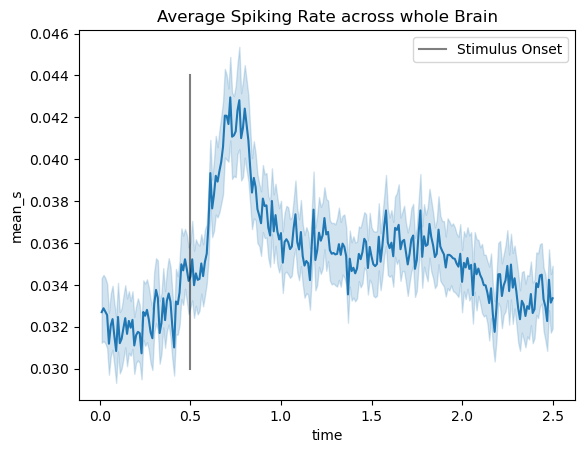

In [22]:
sns.lineplot(data=pop_act_df , x= "time", y='mean_s')
plt.plot([0.5, 0.5], [0.03,0.044], color='k', alpha=0.5, label = "Stimulus Onset")
plt.title('Average Spiking Rate across whole Brain')
plt.legend()

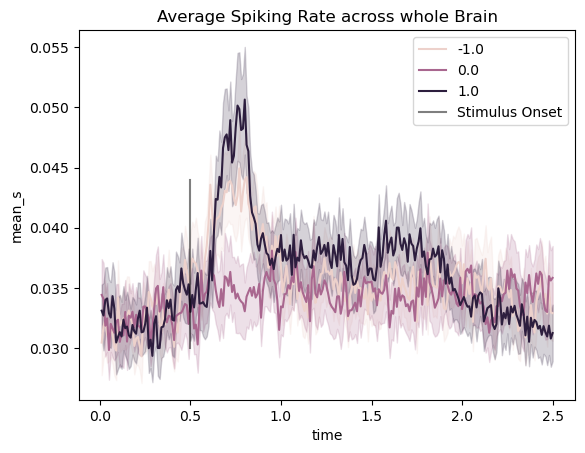

In [21]:
sns.lineplot(data=pop_act_df , x= "time", y='mean_s', hue='response_type')
plt.plot([0.5, 0.5], [0.03,0.044], color='k', alpha=0.5, label = "Stimulus Onset")
plt.title('Average Spiking Rate across whole Brain')
plt.legend()